1:Fit a linear regression model to this dataset, considering X to be the independent variable and Y to be the dependent one, minimizing mean squared error, using the following set of basis functions:
2 3 17 18 φ0(X)=1,φ1(X)=X,φ2(X)=X ,φ3(X)=X ,...,φ17(X)=X ,φ18(X)=X .

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data.csv')
df.head()

,X,Y
0,0.000000,0.090437
1,0.052632,-0.264796
2,0.105263,-0.685704
3,0.157895,-0.700493
4,0.210526,-1.002938


In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [4]:
x = df['X'].values.reshape(-1, 1)
y = df['Y'].values.reshape(-1, 1)

In [5]:
model = PolynomialFeatures(degree=18)
x_fit = model.fit_transform(x)

# Fit the linear regression model
model = LinearRegression()
model.fit(x_fit, y)


LinearRegression()

Create a plot that shows both the original data and the predictions of the regression model, and this model suffers from overfitting.


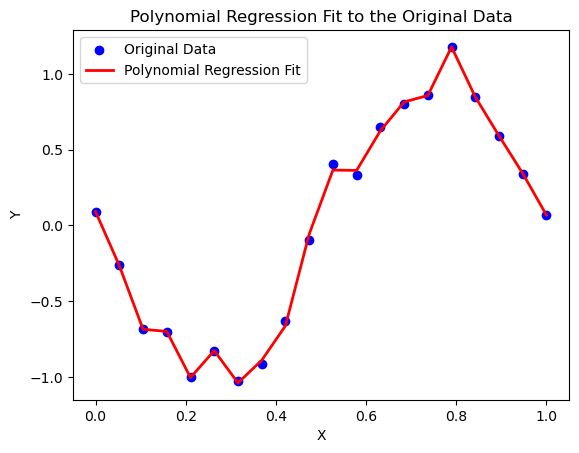

In [6]:
y_pred = model.predict(x_fit)

import matplotlib.pyplot as plt
# Plotting the original data
plt.scatter(df['X'], df['Y'], color='blue', label='Original Data')

# Plotting the regression model predictions
plt.plot(x, y_pred, color='red', label='Polynomial Regression Fit', linewidth=2)

plt.title('Polynomial Regression Fit to the Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

In [7]:
# Extracting the coefficients (parameters) of the Ridge regression model
coefficients = model.coef_

# Displaying the optimal lambda and the model's coefficients
coefficients

array([[ 0.00000000e+00,  1.10444962e+04, -6.86800692e+05,
         1.82599441e+07, -2.80633325e+08,  2.82601655e+09,
        -1.99643361e+10,  1.03155834e+11, -4.00366809e+11,
         1.18692880e+12, -2.71316068e+12,  4.79707364e+12,
        -6.54080245e+12,  6.80954658e+12, -5.31053580e+12,
         3.00156879e+12, -1.16055148e+12,  2.74485807e+11,
        -2.99408711e+10]])

Fit a ridge regression model (i.e., linear regression with a regularization term λ||β||2) to this data using the same set of basis function as before. Use 10-fold cross-validation to find an optimal value for the regularization hyper-parameter λ.

In [8]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

# Re-generating polynomial features (in case the kernel was reset)
poly_features = PolynomialFeatures(degree=18)
x_poly = poly_features.fit_transform(x)

# Define a range of lambda (alpha) values to test
# Typically, it's useful to test a range of values in a logarithmic scale
alphas = np.logspace(-6, 6, 13)

# Setting up 10-fold cross-validation
cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)

# Ridge regression model with built-in cross-validation
ridge_cv = RidgeCV(alphas=alphas, cv=cv, scoring='neg_mean_squared_error')

# Fit the model
ridge_cv.fit(x_poly, y)


RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
        cv=RepeatedKFold(n_repeats=1, n_splits=10, random_state=1),
        scoring='neg_mean_squared_error')

Create a plot that shows the original data, the predictions without regularization, the L2 penalty added relieved the overfitting issues.

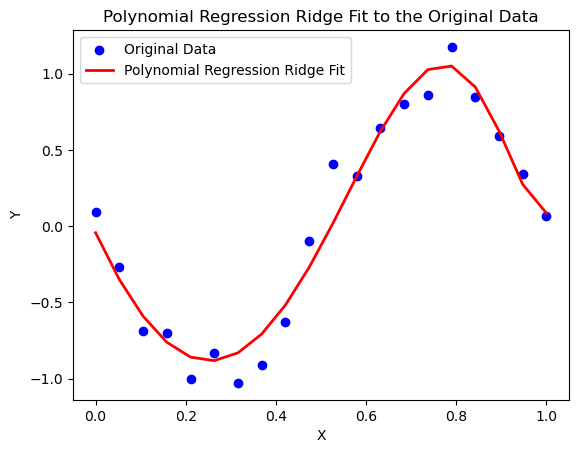

In [9]:
y_pred = ridge_cv.predict(x_poly)

import matplotlib.pyplot as plt
# Plotting the original data
plt.scatter(df['X'], df['Y'], color='blue', label='Original Data')

# Plotting the regression model predictions
plt.plot(x, y_pred, color='red', label='Polynomial Regression Ridge Fit', linewidth=2)

plt.title('Polynomial Regression Ridge Fit to the Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

In [10]:
# Extracting the coefficients (parameters) of the Ridge regression model
ridge_coefficients = ridge_cv.coef_
optimal_alpha = ridge_cv.alpha_

# Displaying the optimal lambda and the model's coefficients
optimal_alpha, ridge_coefficients


(0.001,
 array([[ 0.        , -6.43245155, 11.22246148,  4.86302047, -1.1967738 ,
         -3.7694339 , -3.93550705, -2.98519991, -1.73579171, -0.59670174,
          0.27067547,  0.83340343,  1.11611569,  1.16372034,  1.02367171,
          0.73862291,  0.34417829, -0.13106945, -0.66462992]]))

Repeat the previous two steps for lasso regression (i.e., linear regression with a regularization term λ||β||1). Note that the optimal value of the regularization hyper-parameter may be different.

In [11]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

# Re-generating polynomial features (in case the kernel was reset)
# Generate polynomial features
poly_features = PolynomialFeatures(degree=18)
X_poly = poly_features.fit_transform(x)

# Define a range of lambda (alpha) values to test in Lasso, typically on a logarithmic scale
alphas = np.logspace(-6, 6, 13)

# Setting up 10-fold cross-validation
cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)

# Lasso regression model with built-in cross-validation
# Note: For Lasso, especially with high-degree polynomial features, it's important to increase the max_iter
# to ensure convergence. If the model fails to converge, consider increasing max_iter further.
lasso_cv = LassoCV(alphas=alphas, cv=cv, max_iter=10000, random_state=1)

# Fit the model using the polynomial features
lasso_cv.fit(X_poly, y)

# Optimal lambda (alpha) value found during cross-validation for Lasso
optimal_alpha_lasso = lasso_cv.alpha_
# Extracting the coefficients (parameters) of the Ridge regression model
lasso_coefficients = lasso_cv.coef_

# Displaying the optimal lambda and the model's coefficients
optimal_alpha, lasso_coefficients


/Users/siyuwu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/siyuwu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.682e-02, tolerance: 8.471e-04
  model = cd_fast.enet_coordinate_descent(
/Users/siyuwu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.028e-02, tolerance: 8.471e-04
  model = cd_fast.enet_coor

(0.001,
 array([ 0.        , -8.87698433, 19.04942734,  0.        , -4.15348122,
        -7.70536311, -0.14251443, -0.        , -0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.45208178,  0.89077788,
         0.46136039,  0.        ,  0.        ,  0.        ]))

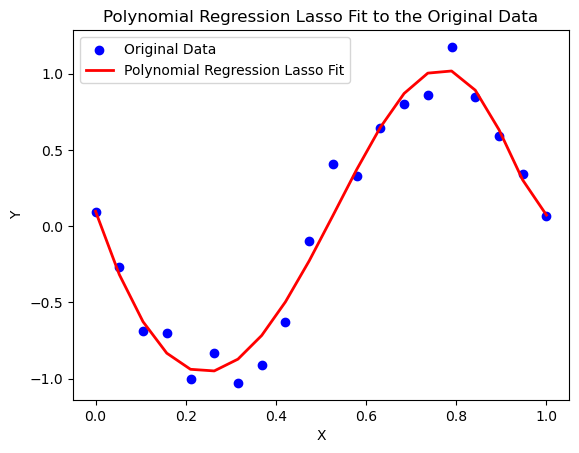

In [12]:
y_pred = lasso_cv.predict(X_poly)

import matplotlib.pyplot as plt
# Plotting the original data
plt.scatter(df['X'], df['Y'], color='blue', label='Original Data')

# Plotting the regression model predictions
plt.plot(x, y_pred, color='red', label='Polynomial Regression Lasso Fit', linewidth=2)

plt.title('Polynomial Regression Lasso Fit to the Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()